In [1]:
import pandas as pd
from utilidades_graficas import *

In [3]:
archivo_resultados = pd.read_excel('out_mv.xlsx')

archivo_resultados.head()

,platform,method,size_a_n,size_a_m,size_b_n,size_b_m,time
0,cuda,punto,500,500,500,1,0.001137
1,cl,punto,500,500,500,1,0.002058
2,numpy,punto,500,500,500,1,0.008188
3,cuda,punto,500,500,500,1,0.000739
4,cl,punto,500,500,500,1,0.000693


In [6]:
plataformas = archivo_resultados['platform'].unique()
metodos = archivo_resultados['method'].unique()
tamaños = archivo_resultados['size_a_m'].unique()
columnas = ['plataforma', 'metodo', 'tamaño', 'tiempo_promedio', 'std_tiempo']
resultados = pd.DataFrame(columns=columnas)

for plataforma in plataformas:
    for metodo in metodos:
        for tamaño in tamaños:
            tabla = archivo_resultados.loc[archivo_resultados['platform'] == plataforma]
            tabla = tabla.loc[tabla['method'] == metodo]
            tabla = tabla.loc[tabla['size_a_m'] == tamaño]
            
            descripcion_tiempo = describir(tabla['time'])            
            valores_fila = [[plataforma, metodo, tamaño] + descripcion_tiempo ]
            fila = pd.DataFrame(valores_fila, columns=columnas)
            resultados = resultados.append(fila, ignore_index=True)
            
resultados.head()

,plataforma,metodo,tamaño,tiempo_promedio,std_tiempo
0,cuda,punto,500,0.000785,0.000129
1,cuda,punto,1000,0.001184,0.000020
2,cuda,punto,1500,0.002275,0.000010
3,cuda,punto,2000,0.003814,0.000009
4,cuda,punto,2500,0.005781,0.000006


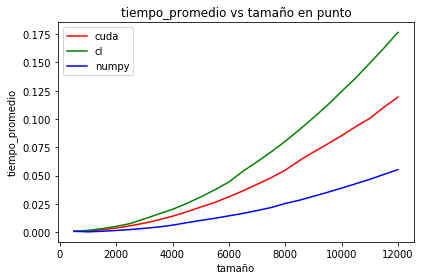

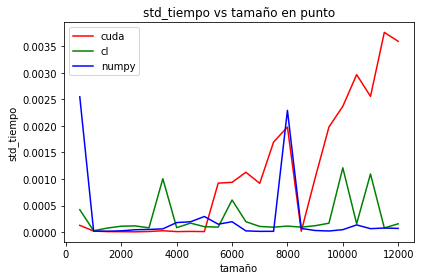

In [7]:
ys = ['tiempo_promedio', 'std_tiempo']
for y in ys:
    for metodo in metodos:
        graficar(resultados, metodo=metodo, x='tamaño', y=y, plataformas=plataformas)